In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)

In [22]:
# 1번 문제

medic = df['상권업종소분류명'] == '약국'    # 상권업종소분류명이 약국인 데이터만 추출
df_medic = df[medic]     # 데이터프레임 형태로 변환
df_medic['시도명'].value_counts()    # 시도명별로 약국 수 세기


경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

<AxesSubplot:>

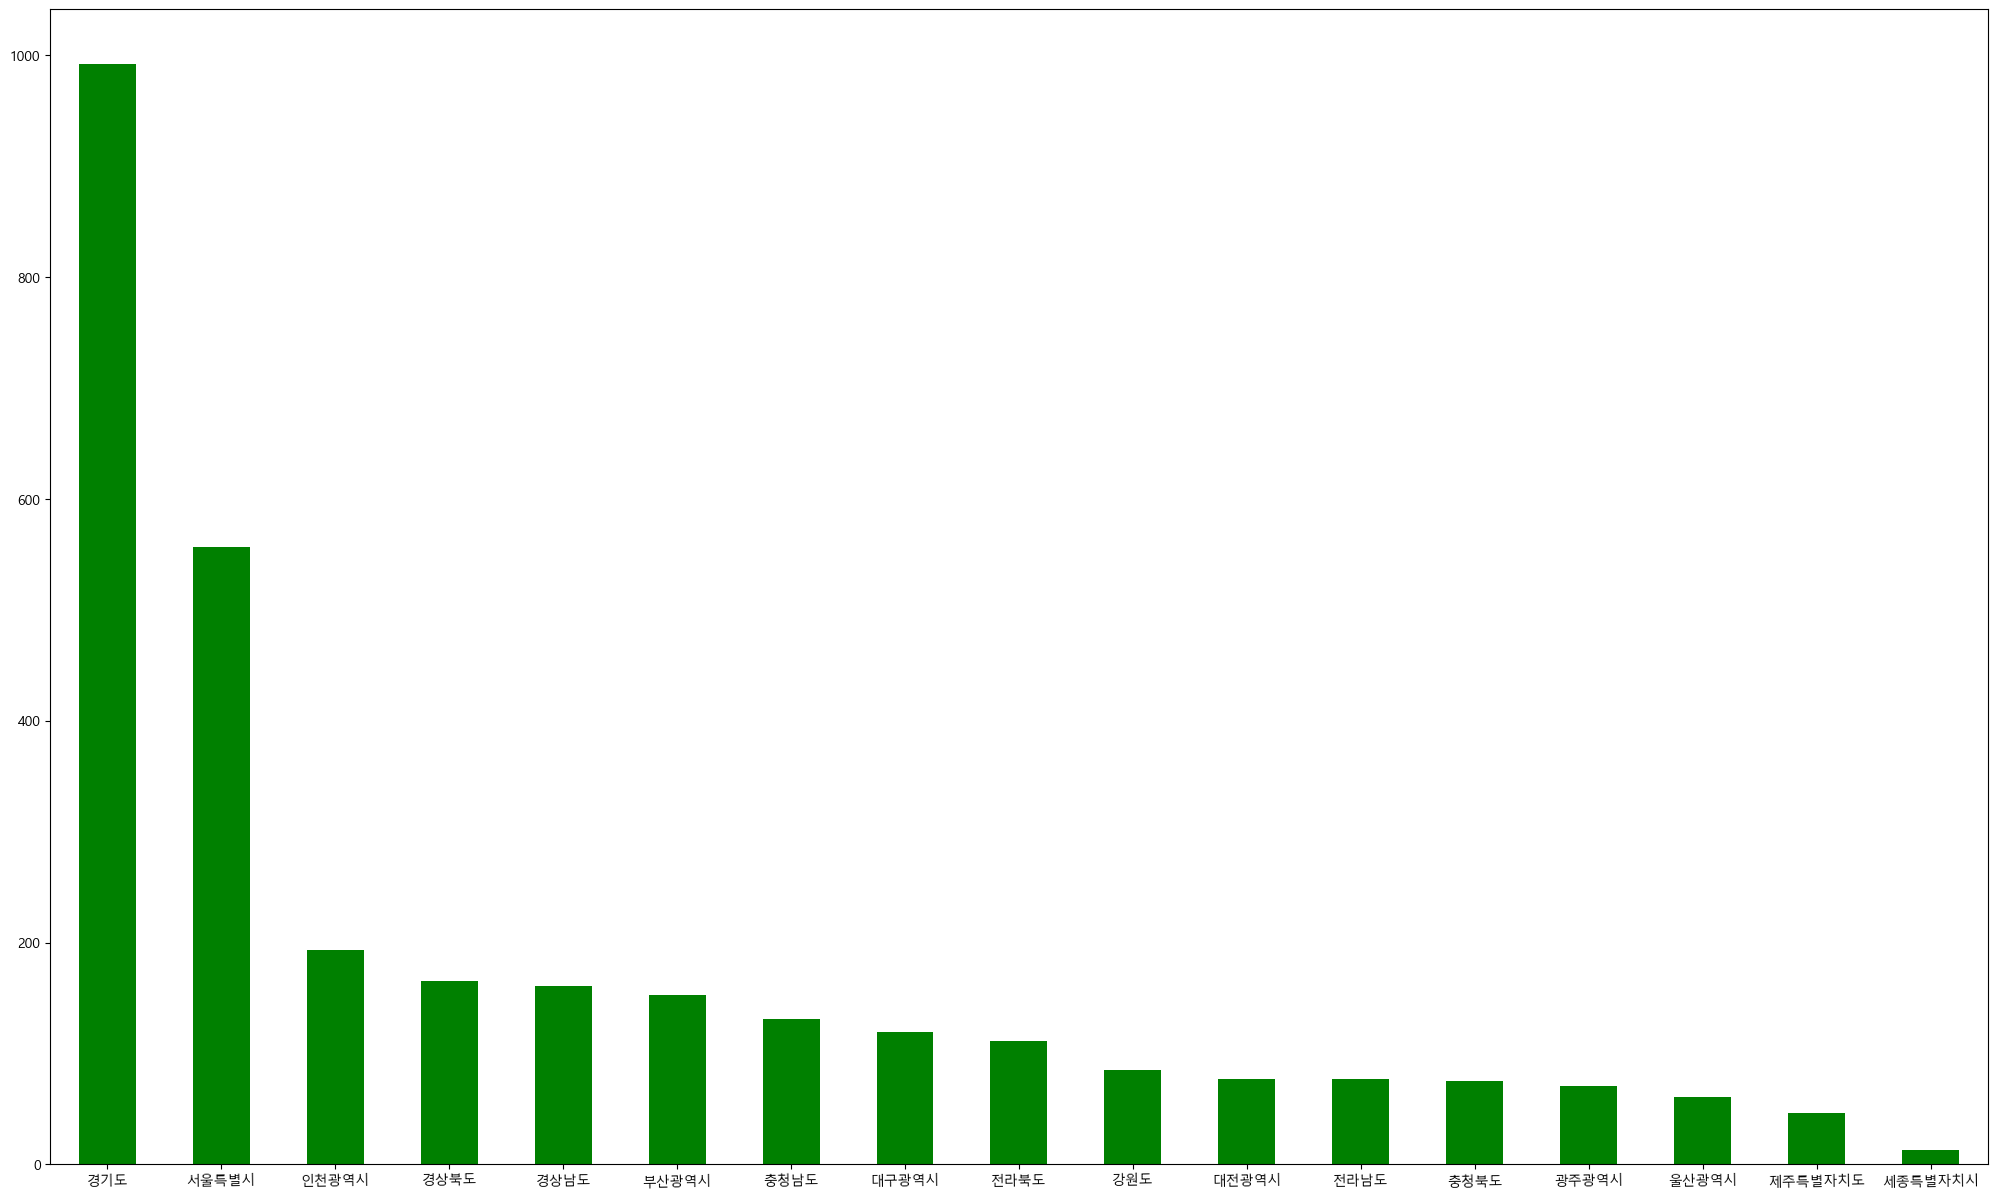

In [21]:
# 2번 문제


veterinary = df['상권업종소분류명'] == '동물병원'  # 동물병원에 해당하는 데이터만 추출
df_veterinary = df[veterinary]

plt.rc('font', family = 'Malgun Gothic')
df_veterinary['시도명'].value_counts().plot.bar(rot = 1,fontsize = 10, figsize = (25,15),color='g')



In [24]:
# 3번 문제

seoul = df['시도명'] == '서울특별시'  # 서울특별시에 위치하는 의료기관 데이터 추출
df_seoul = df[seoul]

skin = df_seoul['상권업종소분류명'].str.contains("피부|성형")  # 서울에 위치하는 의료기관 중 피부과 or 성형외과 데이터 추출
df_seoul_skin = df_seoul[skin]

hospital = df_seoul['상권업종중분류명'] == "병원"  # 상권업종중분류명이 병원에 해당하는 데이터 추출
df_seoul_hospital = df_seoul[hospital]

rate = (df_seoul_skin['시군구명'].value_counts() / df_seoul_hospital['시군구명'].value_counts()) # 각 시군구 별로 전체 병원 중 피부과, 성형외과 차지하는 비율 구하기
rate = rate.round(2)  # 소수점 둘 째 자리에서 반올림
rate.sort_values(ascending=False)  # 내림차순으로 정렬

강남구     0.24
서초구     0.17
마포구     0.09
영등포구    0.08
서대문구    0.08
강서구     0.07
강동구     0.07
중구      0.07
양천구     0.07
중랑구     0.07
성북구     0.06
송파구     0.06
구로구     0.06
은평구     0.06
광진구     0.06
노원구     0.05
성동구     0.05
금천구     0.05
용산구     0.05
강북구     0.05
동대문구    0.04
동작구     0.04
관악구     0.04
종로구     0.03
도봉구     0.02
Name: 시군구명, dtype: float64

In [27]:
# 4번 문제

!pip install folium  # folium 설치
import folium
center = [37.541, 126.986]  # 서울 정중앙 좌표 입력
m = folium.Map(location=center, zoom_start=8)  # 서울이 나오도록 지도 설정

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 96.5/96.5 kB 5.8 MB/s eta 0:00:00


In [30]:
silver = df['상권업종소분류명'] == '노인/치매병원'  # 노인병원 데이터 추출
df_silver = df[silver]

df_silver_location = pd.pivot_table(data = df_silver, index = ["상호명", "도로명주소"], values=["위도", "경도"]) # 피벗테이블을 활용하여 노인병원 위도, 경도 데이터프레임 저장.

for i in range(len(df_silver_location)):     # 노인병원 위도, 경도 데이터를 반복문을 활용하여 하나씩 마커로 위치 찍기.
  folium.Marker([df_silver_location.iloc[i]['위도'], df_silver_location.iloc[i]['경도']], popup = df_silver_location.index[i]).add_to(m)

m